In [1]:

import numpy as np
import mlp
import time
import matplotlib.pyplot as plt
import os


In [2]:

# LOAD DATA
path = os.getcwd()
filename = path+'\data\movements_day1-3.dat'
movements = np.loadtxt(filename,delimiter='\t')



In [3]:


# Subtract arithmetic mean for each sensor. We only care about how it varies:
movements[:,:40] = movements[:,:40] - movements[:,:40].mean(axis=0)

# Find maximum absolute value:
imax = np.concatenate(  ( movements.max(axis=0) * np.ones((1,41)) ,
                          np.abs( movements.min(axis=0) * np.ones((1,41)) ) ),
                          axis=0 ).max(axis=0)

# Divide by imax, values should now be between -1,1
movements[:,:40] = movements[:,:40]/imax[:40]

# Generate target vectors for all inputs 2 -> [0,1,0,0,0,0,0,0]
target = np.zeros((np.shape(movements)[0],8));
for x in range(1,9):
    indices = np.where(movements[:,40]==x)
    target[indices,x-1] = 1

# Randomly order the data
order = list(range(np.shape(movements)[0]))
np.random.shuffle(order)
movements = movements[order,:]
target = target[order,:]

# Split data into 3 sets

# Training updates the weights of the network and thus improves the network
train = movements[::2,0:40]
train_targets = target[::2]

# Validation checks how well the network is performing and when to stop
valid = movements[1::4,0:40]
valid_targets = target[1::4]

# Test data is used to evaluate how good the completely trained network is.
test = movements[3::4,0:40]
test_targets = target[3::4]



(224, 40)
START
hidden nodes = 15 ,iterations choosen = 1000
--------- 0.4548299312591553 seconds ---------

errorrate = 0.05405405405405406% after running NN 317 iterations
[[14.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 19.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  1.]
 [ 1.  0.  0.  2. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  8.]]
THE END


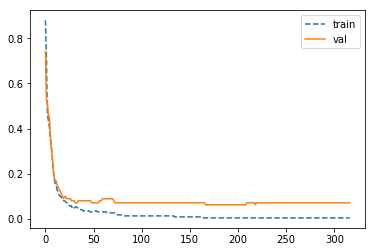

START
hidden nodes = 15 ,iterations choosen = 10000
--------- 0.3422400951385498 seconds ---------

errorrate = 0.05405405405405406% after running NN 225 iterations
[[14.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 19.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  1.]
 [ 1.  0.  0.  2. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  8.]]
THE END


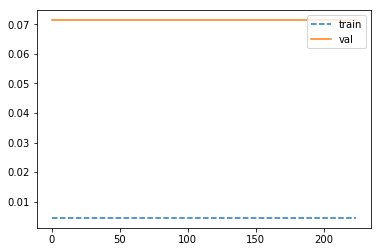

(224, 40)
START
hidden nodes = 30 ,iterations choosen = 1000
--------- 0.5682728290557861 seconds ---------

errorrate = 0.04504504504504504% after running NN 331 iterations
[[14.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 19.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0.]
 [ 1.  0.  0.  2. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.]]
THE END


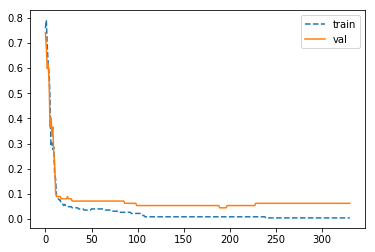

START
hidden nodes = 30 ,iterations choosen = 10000
--------- 0.32839035987854004 seconds ---------

errorrate = 0.04504504504504504% after running NN 225 iterations
[[14.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 19.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0.]
 [ 1.  0.  0.  2. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.]]
THE END


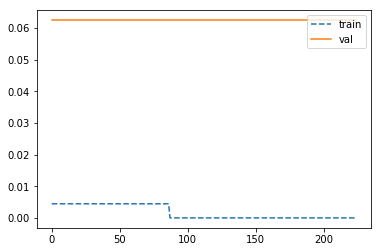

In [4]:


# Run training:
for i in range(2):
    iteratio = [1000, 10000]
    hidden = [15,30]
    net = mlp.mlp(train, train_targets, hidden[i], momentum = 0.00)
    for j in range(2):
        start_time = time.time()
        rounds = iteratio[j]
        print('START')
        print('hidden nodes = %s ,iterations choosen = %s' % (hidden[i],iteratio[j]))
        terror, verror, itera = net.earlystopping(train, train_targets, valid, valid_targets, rounds, treshold = 0.03)
        time_taken = time.time() - start_time
        print("--------- %s seconds ---------\n" % time_taken)
        h, y, out = net.forward(test, test_targets)
        print( 'errorrate = %s%% after running NN %s iterations' % (y, itera))
        print(net.confusion(out, test_targets))
        print('THE END')
        print('====================================')
        line1, = plt.plot(terror, label = "train", linestyle= '--')
        line2, = plt.plot(verror, label = "val", linestyle= '-')
        plt.legend(loc='upper right')
        plt.show()

